# Group 20 - Election Prediction

# Executive Summary

The project began with the need to clean that polling, gender and age dataframe as data was often split over multiple rows which could not be used by the learning machine. This took majority of the assignment time. 

This cleaned dataframe was then used to build two model a Logsic Regression model and a K-nearest Classifer model. These two models preformed to 75% accuracy. 

We then used these models on 2021 electrate data to predict the winner of the federal election. The predicted winner if the election were to be called today would be the Labour party.

# Introduction

As the next federal election occours in 2022, would it be possible to predict the outcome of this election before it even occoured? A variety of sources suggest that election prediction is possible however most of these tests are opinion polling and just take the opinions small portion and apply them to the bigger population to make a prediction. 

In this project we plan on using electrate demographic such as age, gender and state combined with previous election data to develop machine learning models that can then be applied to 2021 electrate data to determine the winner of the next federal election.

# Project Goals

We have 3 main goals this project:
- Determine whether factors such as State, Gender and Age demographics affect which political party winning an electrate
- Detertime which of these features are of greatest importance and create a model using these featues
- Apply this model on 2021 data to determine which political party should win in the next election

# Dataset introduction

## Age and Gender data

The age and Gender data we will be using for the project is dervived from the [Australian Electroal Commision](https://aec.gov.au/enrolling_to_vote/enrolment_stats/elector_count/index.htm) (AEC). For this project we used multiple different years of age and gender data (2019, 2016 and 2021). In the 2019 dataframe this contains 613 rows and 15 columns. Columns are used to split up age data while rows are used to split up gender data. This resulted in alot more rows then needed for this project and as such a vigorus data cleaning process will need to take place. 

## Voting data

Similarly like the Age and Gender data, this Voting data came from the [Australian Electroal Commision](https://results.aec.gov.au/24310/Website/HouseDownloadsMenu-24310-Csv.htm). For each electorate, it shows the distribution of votes for each candidate in both raw numbers and percentages. It additionally shows the preferential voting system in action as this data is structured in rounds with the least popular candidate getting their votes removed and then getting distributed based on the voter’s next preferred candidate. These rounds continue until only two parties remain and the most popular is declared the winner. Some fields we are particularly interested in include, division name (electorate), Calculation, Calculation value, elected, PartyName. 

# Import datapacks

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

# Import dataframes

In [2]:
votedf = pd.read_csv('files/VoteCountByElectrate2019.csv')
votedf

,StateAb,DivisionID,DivisionNm,CountNumber,BallotPosition,CandidateID,Surname,GivenNm,PartyAb,PartyNm,Elected,HistoricElected,CalculationType,CalculationValue
0,ACT,318,Bean,0,1,33426,FAULKNER,Therese,AUP,Australian Progressives,N,N,Preference Count,2722.00
1,ACT,318,Bean,0,1,33426,FAULKNER,Therese,AUP,Australian Progressives,N,N,Preference Percent,2.93
2,ACT,318,Bean,0,1,33426,FAULKNER,Therese,AUP,Australian Progressives,N,N,Transfer Count,0.00
3,ACT,318,Bean,0,1,33426,FAULKNER,Therese,AUP,Australian Progressives,N,N,Transfer Percent,0.00
4,ACT,318,Bean,0,2,32130,CHRISTIE,Jamie,IND,Independent,N,N,Preference Count,7683.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26627,WA,248,Tangney,7,8,32907,FERNANDEZ,Chris,UAPP,United Australia Party,N,N,Transfer Percent,0.00
26628,WA,248,Tangney,7,9,33359,WAUGH,Gavin,WAP,WESTERN AUSTRALIA PARTY,N,N,Preference Count,0.00
26629,WA,248,Tangney,7,9,33359,WAUGH,Gavin,WAP,WESTERN AUSTRALIA PARTY,N,N,Preference Percent,0.00
26630,WA,248,Tangney,7,9,33359,WAUGH,Gavin,WAP,WESTERN AUSTRALIA PARTY,N,N,Transfer Count,0.00


In [3]:
ageAndGender_2016 = pd.read_csv('files/AgeAndGenderByElectrate2016.csv')
ageAndGender_2016

,Unnamed: 0,16-17,18-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70+,TOTAL
0,NSW,"24,198","139,537","395,431","401,545","422,217","419,875","448,092","440,831","445,523","437,910","394,713","368,604","778,471","5,116,947"
1,Banks,551,"2,923","8,206","8,119","8,520","8,526","9,142","9,127","9,688","9,232","7,771","6,898","16,975","105,678"
2,Female,287,"1,484","4,045","4,014","4,257","4,414","4,691","4,793","4,975","4,669","4,017","3,542","9,612","54,800"
3,Male,264,"1,439","4,160","4,104","4,263","4,112","4,451","4,334","4,713","4,563","3,754","3,356","7,363","50,876"
4,Indeterminate/Unknown,-,-,1,1,-,-,-,-,-,-,-,-,-,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,Solomon,110,"1,689","6,388","8,219","8,292","7,326","6,943","6,684","6,253","5,641","4,506","3,602","4,569","70,222"
605,Female,59,841,"3,001","3,835","4,013","3,598","3,385","3,225","3,055","2,753","2,137","1,666","2,247","33,815"
606,Male,51,848,"3,387","4,384","4,279","3,728","3,558","3,459","3,198","2,888","2,369","1,936","2,322","36,407"
607,Indeterminate/Unknown,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [4]:
ageAndGender = pd.read_csv('files/AgeAndGenderByElectrate2019.csv')
ageAndGender

,Unnamed: 0,16-17,18-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70+,TOTAL
0,NSW,"2,481","136,329","412,160","417,600","429,848","450,988","435,764","470,783","431,695","455,489","416,899","373,466","871,675","5,305,177"
1,Banks,56,"2,838","8,617","8,122","8,291","8,773","8,640","9,434","9,068","9,741","8,455","6,933","17,929","106,897"
2,Female,35,"1,409","4,218","3,972","4,115","4,414","4,438","4,913","4,701","4,949","4,280","3,581","10,077","55,102"
3,Male,21,"1,426","4,395","4,147","4,174","4,359","4,202","4,521","4,367","4,792","4,175","3,352","7,852","51,783"
4,Indeterminate/Unknown,-,3,4,3,2,-,-,-,-,-,-,-,-,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Solomon,37,"1,213","5,695","7,319","7,697","7,261","6,718","6,667","6,021","5,635","4,649","3,732","5,669","68,313"
609,Female,28,630,"2,735","3,615","3,727","3,586","3,310","3,267","2,931","2,734","2,228","1,772","2,749","33,312"
610,Male,9,582,"2,958","3,704","3,968","3,674","3,408","3,399","3,090","2,901","2,420","1,960","2,920","34,993"
611,Indeterminate/Unknown,-,1,2,-,2,1,-,1,-,-,1,-,-,8


# Data cleaning

## Male and Female 2019 Data 

The main part of this section is to dervive male and female data from the ageandgender df. In is current state each LGA's information is split over multiple rows when we want it only in one row. 

First we are going to get the total male population for each LGA

In [5]:
#Remove irrelevent columns to getting the male population
males = ageAndGender.drop(['16-17', '18-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69', '70+'], axis = 1)

#Drop rows that do not contain male data
males = males.drop(males.index[(males["Unnamed: 0"] == 'Female') | (males["Unnamed: 0"] == 'Indeterminate/Unknown')])
MalesTotal = males.drop(males.index[(males["Unnamed: 0"] != "Male")])
MalesTotal = MalesTotal.drop(["Unnamed: 0"], axis = 1)
#Rename column to Male_Total
MalesTotal = MalesTotal.rename(columns={'TOTAL': 'Male_Total'})
MalesTotal


,Male_Total
3,"51,783"
7,"53,546"
11,"53,635"
15,"51,950"
19,"52,413"
...,...
593,"50,494"
597,"46,823"
601,"47,311"
606,"35,775"


Here we now have the male totals but we do not know which LGA it belongs to... As such we will need to combine it with each LGA. The code it below:

In [6]:
males["Unnamed: 0"] = males["Unnamed: 0"].str.replace(' ', '')
#Get each LGA in the dataframe
LGA = males.drop(males.index[ (males["Unnamed: 0"] == "Male") 
                            | (males["Unnamed: 0"] == 'NSW')
                            | (males["Unnamed: 0"] == 'VIC')
                            | (males["Unnamed: 0"] == 'NT')
                            | (males["Unnamed: 0"] == 'ACT')
                            | (males["Unnamed: 0"] == 'WA')
                            | (males["Unnamed: 0"] == 'TAS')
                            | (males["Unnamed: 0"] == 'SA')
                            | (males["Unnamed: 0"] == 'QLD')
                            | (males["Unnamed: 0"] == 'GrandTotal')])
LGA = LGA.rename(columns={'Unnamed: 0': 'LGA'})
LGA = LGA.rename(columns={'TOTAL': 'LGA TOTAL'})
LGA


,LGA,LGA TOTAL
1,Banks,"106,897"
5,Barton,"108,706"
9,Bennelong,"109,207"
13,Berowra,"106,381"
17,Blaxland,"105,633"
...,...,...
591,Bean,"104,756"
595,Canberra,"95,657"
599,Fenner,"96,414"
604,Lingiari,"71,895"


We now have each LGA in the Dataframe we just need to combine the male data and the LGA data.

In [7]:
#Reset the indexs for LGA and Male data
LGA = LGA.reset_index()
LGA = LGA.drop(["index"], axis = 1)
MalesTotal = MalesTotal.reset_index()
MalesTotal = MalesTotal.drop(["index"], axis = 1)
#Then force the data to merge on index
MaleLGA = LGA.join(MalesTotal)
MaleLGA

,LGA,LGA TOTAL,Male_Total
0,Banks,"106,897","51,783"
1,Barton,"108,706","53,546"
2,Bennelong,"109,207","53,635"
3,Berowra,"106,381","51,950"
4,Blaxland,"105,633","52,413"
...,...,...,...
146,Bean,"104,756","50,494"
147,Canberra,"95,657","46,823"
148,Fenner,"96,414","47,311"
149,Lingiari,"71,895","35,775"


We now have LGA and Male data, we just need to get the female data now. This process is pretty much the same as getting the male data except changing afew variables

In [8]:
#Drop irelevent columns for female data
females = ageAndGender.drop(['16-17', '18-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69', '70+'], axis = 1)
#Drop rows irelevent for female data
females = females.drop(females.index[(females["Unnamed: 0"] == 'Male') | (males["Unnamed: 0"] == 'Indeterminate/Unknown')])
femalesTotal = females.drop(females.index[(females["Unnamed: 0"] != "Female")])
femalesTotal = femalesTotal.drop(["Unnamed: 0"], axis = 1)
#Reset index to join LGA data
femalesTotal = femalesTotal.reset_index()
femalesTotal = femalesTotal.drop(["index"], axis = 1)
femalesTotal = femalesTotal.rename(columns={'TOTAL': 'Female_Total'})
#Combine LGA data and Femaledate
femaleLGA = LGA.join(femalesTotal)
femaleLGA

,LGA,LGA TOTAL,Female_Total
0,Banks,"106,897","55,102"
1,Barton,"108,706","55,133"
2,Bennelong,"109,207","55,551"
3,Berowra,"106,381","54,418"
4,Blaxland,"105,633","53,215"
...,...,...,...
146,Bean,"104,756","54,236"
147,Canberra,"95,657","48,785"
148,Fenner,"96,414","49,088"
149,Lingiari,"71,895","36,082"


We now have the female data and the male data we just need to merge them into one dataframe.

In [9]:
#Merge the Female df and male df on the column LGA
GenderByLGA = pd.merge(femaleLGA ,MaleLGA, on="LGA" )
#As there is now 2 LGA_Total columns we need to drop 1
GenderByLGA = GenderByLGA.drop(["LGA TOTAL_y"], axis = 1)
#Renaming LGA column to be more readable
GenderByLGA = GenderByLGA.rename(columns={'LGA TOTAL_x': 'LGA TOTAL'})
GenderByLGA = GenderByLGA.drop(['LGA TOTAL'], axis = 1)
GenderByLGA

,LGA,Female_Total,Male_Total
0,Banks,"55,102","51,783"
1,Barton,"55,133","53,546"
2,Bennelong,"55,551","53,635"
3,Berowra,"54,418","51,950"
4,Blaxland,"53,215","52,413"
...,...,...,...
146,Bean,"54,236","50,494"
147,Canberra,"48,785","46,823"
148,Fenner,"49,088","47,311"
149,Lingiari,"36,082","35,775"


This table now contains the total male and female for each LGA but not the total population. We should add it. 

In [10]:
#Removing commas so can convert string to an interger
GenderByLGA['Female_Total'] = GenderByLGA['Female_Total'].str.replace(',', '').astype(int)
GenderByLGA['Male_Total'] = GenderByLGA['Male_Total'].str.replace(',', '').astype(int)
#Converting columns to int
GenderByLGA['Female_Total'] = GenderByLGA['Female_Total'].astype(int)
GenderByLGA['Male_Total'] = GenderByLGA['Male_Total'].astype(int)
#The total population is calculated Total Male + Total Female = Total Population
GenderByLGA['Total_Population'] = GenderByLGA['Male_Total'] + GenderByLGA['Female_Total']
GenderByLGA

,LGA,Female_Total,Male_Total,Total_Population
0,Banks,55102,51783,106885
1,Barton,55133,53546,108679
2,Bennelong,55551,53635,109186
3,Berowra,54418,51950,106368
4,Blaxland,53215,52413,105628
...,...,...,...,...
146,Bean,54236,50494,104730
147,Canberra,48785,46823,95608
148,Fenner,49088,47311,96399
149,Lingiari,36082,35775,71857


## Age

The main part of this section is to get the age data for each LGA.

In [11]:
ages = ageAndGender
# Drop irelevent rows to the df
ages = ages.drop(ages.index[(ages["Unnamed: 0"] == "Male") 
                            |(ages["Unnamed: 0"] == "Female")
                            |(ages["Unnamed: 0"] == "Indeterminate/Unknown")
                            | (ages["Unnamed: 0"] == 'NSW')
                            | (ages["Unnamed: 0"] == 'VIC')
                            | (ages["Unnamed: 0"] == 'NT')
                            | (ages["Unnamed: 0"] == 'ACT')
                            | (ages["Unnamed: 0"] == 'WA')
                            | (ages["Unnamed: 0"] == 'TAS')
                            | (ages["Unnamed: 0"] == 'SA')
                            | (ages["Unnamed: 0"] == 'QLD')
                            | (ages["Unnamed: 0"] == 'Grand Total')])
ages = ages.drop(['TOTAL'], axis = 1)
#Rename column to use for merge later on
ages = ages.rename(columns={'Unnamed: 0': 'LGA'})
ages

,LGA,16-17,18-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70+
1,Banks,56,"2,838","8,617","8,122","8,291","8,773","8,640","9,434","9,068","9,741","8,455","6,933","17,929"
5,Barton,40,"2,449","8,187","8,794","9,715","10,418","9,505","9,915","8,981","8,952","7,627","6,642","17,481"
9,Bennelong,88,"2,927","8,953","8,671","9,053","10,016","9,389","9,729","9,129","9,518","8,251","6,930","16,553"
13,Berowra,93,"3,561","9,328","6,845","5,894","7,398","8,982","10,429","9,686","10,215","8,833","7,426","17,691"
17,Blaxland,39,"2,899","9,762","9,509","9,621","9,485","8,812","8,878","8,535","8,801","8,020","6,495","14,777"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,Bean,51,"2,748","8,437","8,749","9,221","9,441","8,881","9,576","8,925","9,145","8,000","7,015","14,567"
595,Canberra,96,"2,774","9,282","9,880","9,046","8,710","7,792","8,109","7,336","7,124","6,162","5,713","13,633"
599,Fenner,58,"2,540","7,932","9,019","10,888","12,242","10,647","9,726","7,454","6,422","5,344","4,855","9,287"
604,Lingiari,107,"1,138","5,588","7,951","8,338","8,034","7,023","7,657","6,858","6,161","5,040","3,547","4,453"


In [12]:
#Converting strings to intergers 
ages['16-17'] = ages['16-17'].str.replace(',', '').astype(int)
ages['18-19'] = ages['18-19'].str.replace(',', '').astype(int)
ages['20-24'] = ages['20-24'].str.replace(',', '').astype(int)
ages['25-29'] = ages['25-29'].str.replace(',', '').astype(int)
ages['30-34'] = ages['30-34'].str.replace(',', '').astype(int)
ages['35-39'] = ages['35-39'].str.replace(',', '').astype(int)
ages['40-44'] = ages['40-44'].str.replace(',', '').astype(int)
ages['45-49'] = ages['45-49'].str.replace(',', '').astype(int)
ages['50-54'] = ages['50-54'].str.replace(',', '').astype(int)
ages['55-59'] = ages['55-59'].str.replace(',', '').astype(int)
ages['60-64'] = ages['60-64'].str.replace(',', '').astype(int)
ages['65-69'] = ages['65-69'].str.replace(',', '').astype(int)
ages['70+'  ] = ages['70+'  ].str.replace(',', '').astype(int)
ages

,LGA,16-17,18-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70+
1,Banks,56,2838,8617,8122,8291,8773,8640,9434,9068,9741,8455,6933,17929
5,Barton,40,2449,8187,8794,9715,10418,9505,9915,8981,8952,7627,6642,17481
9,Bennelong,88,2927,8953,8671,9053,10016,9389,9729,9129,9518,8251,6930,16553
13,Berowra,93,3561,9328,6845,5894,7398,8982,10429,9686,10215,8833,7426,17691
17,Blaxland,39,2899,9762,9509,9621,9485,8812,8878,8535,8801,8020,6495,14777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,Bean,51,2748,8437,8749,9221,9441,8881,9576,8925,9145,8000,7015,14567
595,Canberra,96,2774,9282,9880,9046,8710,7792,8109,7336,7124,6162,5713,13633
599,Fenner,58,2540,7932,9019,10888,12242,10647,9726,7454,6422,5344,4855,9287
604,Lingiari,107,1138,5588,7951,8338,8034,7023,7657,6858,6161,5040,3547,4453


In [13]:
#Merging the gender data and age data 
ageAndGenderByLGA = pd.merge(ages ,GenderByLGA, on="LGA" )
ageAndGenderByLGA

,LGA,16-17,18-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70+,Female_Total,Male_Total,Total_Population
0,Banks,56,2838,8617,8122,8291,8773,8640,9434,9068,9741,8455,6933,17929,55102,51783,106885
1,Barton,40,2449,8187,8794,9715,10418,9505,9915,8981,8952,7627,6642,17481,55133,53546,108679
2,Bennelong,88,2927,8953,8671,9053,10016,9389,9729,9129,9518,8251,6930,16553,55551,53635,109186
3,Berowra,93,3561,9328,6845,5894,7398,8982,10429,9686,10215,8833,7426,17691,54418,51950,106368
4,Blaxland,39,2899,9762,9509,9621,9485,8812,8878,8535,8801,8020,6495,14777,53215,52413,105628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Bean,51,2748,8437,8749,9221,9441,8881,9576,8925,9145,8000,7015,14567,54236,50494,104730
142,Canberra,96,2774,9282,9880,9046,8710,7792,8109,7336,7124,6162,5713,13633,48785,46823,95608
143,Fenner,58,2540,7932,9019,10888,12242,10647,9726,7454,6422,5344,4855,9287,49088,47311,96399
144,Lingiari,107,1138,5588,7951,8338,8034,7023,7657,6858,6161,5040,3547,4453,36082,35775,71857


## Polling data

In [14]:
votedf

,StateAb,DivisionID,DivisionNm,CountNumber,BallotPosition,CandidateID,Surname,GivenNm,PartyAb,PartyNm,Elected,HistoricElected,CalculationType,CalculationValue
0,ACT,318,Bean,0,1,33426,FAULKNER,Therese,AUP,Australian Progressives,N,N,Preference Count,2722.00
1,ACT,318,Bean,0,1,33426,FAULKNER,Therese,AUP,Australian Progressives,N,N,Preference Percent,2.93
2,ACT,318,Bean,0,1,33426,FAULKNER,Therese,AUP,Australian Progressives,N,N,Transfer Count,0.00
3,ACT,318,Bean,0,1,33426,FAULKNER,Therese,AUP,Australian Progressives,N,N,Transfer Percent,0.00
4,ACT,318,Bean,0,2,32130,CHRISTIE,Jamie,IND,Independent,N,N,Preference Count,7683.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26627,WA,248,Tangney,7,8,32907,FERNANDEZ,Chris,UAPP,United Australia Party,N,N,Transfer Percent,0.00
26628,WA,248,Tangney,7,9,33359,WAUGH,Gavin,WAP,WESTERN AUSTRALIA PARTY,N,N,Preference Count,0.00
26629,WA,248,Tangney,7,9,33359,WAUGH,Gavin,WAP,WESTERN AUSTRALIA PARTY,N,N,Preference Percent,0.00
26630,WA,248,Tangney,7,9,33359,WAUGH,Gavin,WAP,WESTERN AUSTRALIA PARTY,N,N,Transfer Count,0.00


In [15]:
#Drop ilrelevent columns
LGAWin = votedf.drop(['DivisionID', 'BallotPosition', "CandidateID", "Surname", "GivenNm"], axis = 1)
LGAWin

,StateAb,DivisionNm,CountNumber,PartyAb,PartyNm,Elected,HistoricElected,CalculationType,CalculationValue
0,ACT,Bean,0,AUP,Australian Progressives,N,N,Preference Count,2722.00
1,ACT,Bean,0,AUP,Australian Progressives,N,N,Preference Percent,2.93
2,ACT,Bean,0,AUP,Australian Progressives,N,N,Transfer Count,0.00
3,ACT,Bean,0,AUP,Australian Progressives,N,N,Transfer Percent,0.00
4,ACT,Bean,0,IND,Independent,N,N,Preference Count,7683.00
...,...,...,...,...,...,...,...,...,...
26627,WA,Tangney,7,UAPP,United Australia Party,N,N,Transfer Percent,0.00
26628,WA,Tangney,7,WAP,WESTERN AUSTRALIA PARTY,N,N,Preference Count,0.00
26629,WA,Tangney,7,WAP,WESTERN AUSTRALIA PARTY,N,N,Preference Percent,0.00
26630,WA,Tangney,7,WAP,WESTERN AUSTRALIA PARTY,N,N,Transfer Count,0.00


Now this is the conplicated part of the dataframe. As Australia's voting system is preferential the dataframe tried to be structured the same. For each electrate the df has the Column "CountNumber" which acts like a round system where each party of least popularity gets their votes removed and added to their next preference. This CountNumber is different for each electrate so we must first caculate which is the "last round" of counting votes.

In [16]:
#Finding each unique LGA in the df
LGAWin["DivisionNm"].unique()

array(['Bean', 'Canberra', 'Fenner', 'Banks', 'Barton', 'Bennelong',
       'Berowra', 'Blaxland', 'Bradfield', 'Calare', 'Chifley', 'Cook',
       'Cowper', 'Cunningham', 'Dobell', 'Eden-Monaro', 'Farrer',
       'Fowler', 'Gilmore', 'Grayndler', 'Greenway', 'Hughes', 'Hume',
       'Hunter', 'Kingsford Smith', 'Lindsay', 'Lyne', 'Macarthur',
       'Mackellar', 'Macquarie', 'McMahon', 'Mitchell', 'New England',
       'Newcastle', 'North Sydney', 'Page', 'Parkes', 'Parramatta',
       'Paterson', 'Reid', 'Richmond', 'Riverina', 'Robertson',
       'Shortland', 'Sydney', 'Warringah', 'Watson', 'Wentworth',
       'Werriwa', 'Whitlam', 'Lingiari', 'Solomon', 'Blair', 'Bonner',
       'Bowman', 'Brisbane', 'Capricornia', 'Dawson', 'Dickson', 'Fadden',
       'Fairfax', 'Fisher', 'Flynn', 'Forde', 'Griffith', 'Groom',
       'Herbert', 'Hinkler', 'Kennedy', 'Leichhardt', 'Lilley', 'Longman',
       'Maranoa', 'McPherson', 'Moncrieff', 'Moreton', 'Oxley', 'Petrie',
       'Rankin', 'Ryan'

In [17]:
VoteLGA = LGAWin["DivisionNm"].unique()
# This is a loop that finds and removed rows that are not part of the last vote count
for x in VoteLGA:
    LGA = LGAWin[LGAWin["DivisionNm"] == x]
    CountMax = LGA['CountNumber'].max()
    LGAWin = LGAWin.drop(LGAWin.index[(LGAWin["DivisionNm"] == x) 
                            &(LGAWin["CountNumber"] != CountMax)])
LGAWin

,StateAb,DivisionNm,CountNumber,PartyAb,PartyNm,Elected,HistoricElected,CalculationType,CalculationValue
192,ACT,Bean,6,AUP,Australian Progressives,N,N,Preference Count,0.0
193,ACT,Bean,6,AUP,Australian Progressives,N,N,Preference Percent,0.0
194,ACT,Bean,6,AUP,Australian Progressives,N,N,Transfer Count,0.0
195,ACT,Bean,6,AUP,Australian Progressives,N,N,Transfer Percent,0.0
196,ACT,Bean,6,IND,Independent,N,N,Preference Count,0.0
...,...,...,...,...,...,...,...,...,...
26627,WA,Tangney,7,UAPP,United Australia Party,N,N,Transfer Percent,0.0
26628,WA,Tangney,7,WAP,WESTERN AUSTRALIA PARTY,N,N,Preference Count,0.0
26629,WA,Tangney,7,WAP,WESTERN AUSTRALIA PARTY,N,N,Preference Percent,0.0
26630,WA,Tangney,7,WAP,WESTERN AUSTRALIA PARTY,N,N,Transfer Count,0.0


In [18]:
#As the votes of many partys have been transfered to their next perfered candidate alot of current candidates have 0 votes
#as such we should remove them
LGAWin = LGAWin.drop(LGAWin.index[(LGAWin["CalculationValue"] <= 0.0)])
LGAWin

,StateAb,DivisionNm,CountNumber,PartyAb,PartyNm,Elected,HistoricElected,CalculationType,CalculationValue
212,ACT,Bean,6,LP,Liberal,N,N,Preference Count,39484.00
213,ACT,Bean,6,LP,Liberal,N,N,Preference Percent,42.48
214,ACT,Bean,6,LP,Liberal,N,N,Transfer Count,2814.00
215,ACT,Bean,6,LP,Liberal,N,N,Transfer Percent,17.02
216,ACT,Bean,6,ALP,Australian Labor Party,Y,N,Preference Count,53455.00
...,...,...,...,...,...,...,...,...,...
26599,WA,Tangney,7,ALP,Australian Labor Party,N,N,Transfer Percent,76.64
26620,WA,Tangney,7,LP,Liberal,Y,Y,Preference Count,51275.00
26621,WA,Tangney,7,LP,Liberal,Y,Y,Preference Percent,61.47
26622,WA,Tangney,7,LP,Liberal,Y,Y,Transfer Count,2643.00


In [19]:
#We dont care about the amount of votes that were transfered to each next canditate and as such we should drop the rows
LGAWin = LGAWin.drop(LGAWin.index[(LGAWin["CalculationType"] == "Transfer Count")])
LGAWin = LGAWin.drop(LGAWin.index[(LGAWin["CalculationType"] == "Transfer Percent")])
LGAWin

,StateAb,DivisionNm,CountNumber,PartyAb,PartyNm,Elected,HistoricElected,CalculationType,CalculationValue
212,ACT,Bean,6,LP,Liberal,N,N,Preference Count,39484.00
213,ACT,Bean,6,LP,Liberal,N,N,Preference Percent,42.48
216,ACT,Bean,6,ALP,Australian Labor Party,Y,N,Preference Count,53455.00
217,ACT,Bean,6,ALP,Australian Labor Party,Y,N,Preference Percent,57.52
324,ACT,Canberra,4,ALP,Australian Labor Party,Y,N,Preference Count,57961.00
...,...,...,...,...,...,...,...,...,...
26341,WA,Swan,8,ALP,Australian Labor Party,N,N,Preference Percent,47.31
26596,WA,Tangney,7,ALP,Australian Labor Party,N,N,Preference Count,32144.00
26597,WA,Tangney,7,ALP,Australian Labor Party,N,N,Preference Percent,38.53
26620,WA,Tangney,7,LP,Liberal,Y,Y,Preference Count,51275.00


In [20]:
#Find each partys in the df
LGAWin['PartyAb'].unique()

array(['LP', 'ALP', 'NP', 'IND', 'GRN', 'CLP', 'LNP', 'KAP', 'ON', 'XEN',
       'GVIC'], dtype=object)

In [21]:
#Renaming Liberals and Nationals to the Liberal National Party
LGAWin['PartyNm'] = LGAWin['PartyNm'].str.replace('Liberal', 'LNP')
LGAWin['PartyNm'] = LGAWin['PartyNm'].str.replace('National', 'LNP')
LGAWin['PartyNm'] = LGAWin['PartyNm'].str.replace('LNP', 'Liberal National Party')
LGAWin

,StateAb,DivisionNm,CountNumber,PartyAb,PartyNm,Elected,HistoricElected,CalculationType,CalculationValue
212,ACT,Bean,6,LP,Liberal National Party,N,N,Preference Count,39484.00
213,ACT,Bean,6,LP,Liberal National Party,N,N,Preference Percent,42.48
216,ACT,Bean,6,ALP,Australian Labor Party,Y,N,Preference Count,53455.00
217,ACT,Bean,6,ALP,Australian Labor Party,Y,N,Preference Percent,57.52
324,ACT,Canberra,4,ALP,Australian Labor Party,Y,N,Preference Count,57961.00
...,...,...,...,...,...,...,...,...,...
26341,WA,Swan,8,ALP,Australian Labor Party,N,N,Preference Percent,47.31
26596,WA,Tangney,7,ALP,Australian Labor Party,N,N,Preference Count,32144.00
26597,WA,Tangney,7,ALP,Australian Labor Party,N,N,Preference Percent,38.53
26620,WA,Tangney,7,LP,Liberal National Party,Y,Y,Preference Count,51275.00


In [22]:
#Make a seperate df to hold the counts for LNP
LP = LGAWin[LGAWin["PartyNm"]=='Liberal National Party']
LP

,StateAb,DivisionNm,CountNumber,PartyAb,PartyNm,Elected,HistoricElected,CalculationType,CalculationValue
212,ACT,Bean,6,LP,Liberal National Party,N,N,Preference Count,39484.00
213,ACT,Bean,6,LP,Liberal National Party,N,N,Preference Percent,42.48
332,ACT,Canberra,4,LP,Liberal National Party,N,N,Preference Count,28442.00
333,ACT,Canberra,4,LP,Liberal National Party,N,N,Preference Percent,32.92
420,ACT,Fenner,3,LP,Liberal National Party,N,N,Preference Count,34171.00
...,...,...,...,...,...,...,...,...,...
25969,WA,Stirling,5,LP,Liberal National Party,Y,N,Preference Percent,55.65
26304,WA,Swan,8,LP,Liberal National Party,Y,Y,Preference Count,44333.00
26305,WA,Swan,8,LP,Liberal National Party,Y,Y,Preference Percent,52.69
26620,WA,Tangney,7,LP,Liberal National Party,Y,Y,Preference Count,51275.00


In [23]:
#Only need the counts of each electrate
LPCount = LP[LP["CalculationType"]=='Preference Count']
#Renaming CalculationValue to Liberal/NationalCount
LPCount = LPCount.rename(columns={'CalculationValue': 'Liberal/NationalCount'})
LPCount

,StateAb,DivisionNm,CountNumber,PartyAb,PartyNm,Elected,HistoricElected,CalculationType,Liberal/NationalCount
212,ACT,Bean,6,LP,Liberal National Party,N,N,Preference Count,39484.0
332,ACT,Canberra,4,LP,Liberal National Party,N,N,Preference Count,28442.0
420,ACT,Fenner,3,LP,Liberal National Party,N,N,Preference Count,34171.0
520,NSW,Banks,4,LP,Liberal National Party,Y,Y,Preference Count,51609.0
644,NSW,Barton,4,LP,Liberal National Party,N,N,Preference Count,36489.0
...,...,...,...,...,...,...,...,...,...
25560,WA,Pearce,8,LP,Liberal National Party,Y,Y,Preference Count,57478.0
25792,WA,Perth,6,LP,Liberal National Party,N,N,Preference Count,39530.0
25968,WA,Stirling,5,LP,Liberal National Party,Y,N,Preference Count,48289.0
26304,WA,Swan,8,LP,Liberal National Party,Y,Y,Preference Count,44333.0


In [24]:
#Droping ilrelevent columns in the df
LPCount = LPCount.drop(['CountNumber', 'PartyNm', "HistoricElected", "CalculationType", 'PartyAb',"Elected"], axis = 1)
LPCount

,StateAb,DivisionNm,Liberal/NationalCount
212,ACT,Bean,39484.0
332,ACT,Canberra,28442.0
420,ACT,Fenner,34171.0
520,NSW,Banks,51609.0
644,NSW,Barton,36489.0
...,...,...,...
25560,WA,Pearce,57478.0
25792,WA,Perth,39530.0
25968,WA,Stirling,48289.0
26304,WA,Swan,44333.0


In [25]:
#Create a new df to hold the votes for the ALP
ALPCount = LGAWin[LGAWin["PartyAb"]=='ALP']
ALPCount

,StateAb,DivisionNm,CountNumber,PartyAb,PartyNm,Elected,HistoricElected,CalculationType,CalculationValue
216,ACT,Bean,6,ALP,Australian Labor Party,Y,N,Preference Count,53455.00
217,ACT,Bean,6,ALP,Australian Labor Party,Y,N,Preference Percent,57.52
324,ACT,Canberra,4,ALP,Australian Labor Party,Y,N,Preference Count,57961.00
325,ACT,Canberra,4,ALP,Australian Labor Party,Y,N,Preference Percent,67.08
416,ACT,Fenner,3,ALP,Australian Labor Party,Y,Y,Preference Count,52462.00
...,...,...,...,...,...,...,...,...,...
25981,WA,Stirling,5,ALP,Australian Labor Party,N,N,Preference Percent,44.35
26340,WA,Swan,8,ALP,Australian Labor Party,N,N,Preference Count,39804.00
26341,WA,Swan,8,ALP,Australian Labor Party,N,N,Preference Percent,47.31
26596,WA,Tangney,7,ALP,Australian Labor Party,N,N,Preference Count,32144.00


In [26]:
#Only need the total preference count
ALPCount = ALPCount[ALPCount["CalculationType"]=='Preference Count']
ALPCount

,StateAb,DivisionNm,CountNumber,PartyAb,PartyNm,Elected,HistoricElected,CalculationType,CalculationValue
216,ACT,Bean,6,ALP,Australian Labor Party,Y,N,Preference Count,53455.0
324,ACT,Canberra,4,ALP,Australian Labor Party,Y,N,Preference Count,57961.0
416,ACT,Fenner,3,ALP,Australian Labor Party,Y,Y,Preference Count,52462.0
528,NSW,Banks,4,ALP,Labor,N,N,Preference Count,40121.0
640,NSW,Barton,4,ALP,Labor,Y,Y,Preference Count,53418.0
...,...,...,...,...,...,...,...,...,...
25556,WA,Pearce,8,ALP,Australian Labor Party,N,N,Preference Count,42445.0
25788,WA,Perth,6,ALP,Australian Labor Party,Y,Y,Preference Count,48176.0
25980,WA,Stirling,5,ALP,Australian Labor Party,N,N,Preference Count,38490.0
26340,WA,Swan,8,ALP,Australian Labor Party,N,N,Preference Count,39804.0


In [27]:
#Drop other irelevent columns
ALPCount = ALPCount.drop(['CountNumber', 'PartyNm', "HistoricElected", "CalculationType", 'PartyAb',"Elected", 'StateAb'], axis = 1)
#Renaming CalculationValue to LabourCount
ALPCount = ALPCount.rename(columns={'CalculationValue': 'LabourCount'})
ALPCount

,DivisionNm,LabourCount
216,Bean,53455.0
324,Canberra,57961.0
416,Fenner,52462.0
528,Banks,40121.0
640,Barton,53418.0
...,...,...
25556,Pearce,42445.0
25788,Perth,48176.0
25980,Stirling,38490.0
26340,Swan,39804.0


In [28]:
#Combing the Labour Count and the LNP counts into 1 dataframe
VoteCountByLGA = pd.merge(LPCount, ALPCount, on="DivisionNm")
#Renaming DivisionNm to LGA
VoteCountByLGA = VoteCountByLGA.rename(columns={'DivisionNm': 'LGA'})
VoteCountByLGA

,StateAb,LGA,Liberal/NationalCount,LabourCount
0,ACT,Bean,39484.0,53455.0
1,ACT,Canberra,28442.0,57961.0
2,ACT,Fenner,34171.0,52462.0
3,NSW,Banks,51609.0,40121.0
4,NSW,Barton,36489.0,53418.0
...,...,...,...,...
90,WA,Pearce,57478.0,42445.0
91,WA,Perth,39530.0,48176.0
92,WA,Stirling,48289.0,38490.0
93,WA,Swan,44333.0,39804.0


In [29]:
#List of all LGA's
LGAS = VoteCountByLGA["LGA"].unique()
#New list that will be turned into a column later on
Winner = []
#New list for each LGA
LGAList = []
#A for loop that will compare the Liberal Counts and Labour Counts in each row and determine a winner
for x in LGAS:
    LGAdf = VoteCountByLGA[VoteCountByLGA["LGA"]==x]
    LibCount = LGAdf["Liberal/NationalCount"]
    LibCount = LibCount.sum()
    LabCount = LGAdf["LabourCount"]
    LabCount = LabCount.sum()
    LGAList.append(x)
    if LabCount > LibCount:
        Winner.append("Labour")
    else:
        Winner.append("Liberal/National")
Winner

['Labour',
 'Labour',
 'Labour',
 'Liberal/National',
 'Labour',
 'Liberal/National',
 'Liberal/National',
 'Labour',
 'Liberal/National',
 'Labour',
 'Liberal/National',
 'Labour',
 'Labour',
 'Labour',
 'Labour',
 'Labour',
 'Labour',
 'Liberal/National',
 'Liberal/National',
 'Labour',
 'Liberal/National',
 'Labour',
 'Liberal/National',
 'Labour',
 'Labour',
 'Liberal/National',
 'Labour',
 'Liberal/National',
 'Labour',
 'Labour',
 'Liberal/National',
 'Liberal/National',
 'Labour',
 'Labour',
 'Labour',
 'Labour',
 'Labour',
 'Liberal/National',
 'Liberal/National',
 'Liberal/National',
 'Labour',
 'Labour',
 'Labour',
 'Labour',
 'Liberal/National',
 'Liberal/National',
 'Liberal/National',
 'Labour',
 'Labour',
 'Liberal/National',
 'Labour',
 'Labour',
 'Labour',
 'Labour',
 'Liberal/National',
 'Liberal/National',
 'Labour',
 'Labour',
 'Liberal/National',
 'Labour',
 'Liberal/National',
 'Labour',
 'Labour',
 'Liberal/National',
 'Labour',
 'Liberal/National',
 'Labour',
 'L

In [30]:
#Createing new df for the Winning party for each LGA
Winnerdf = {'LGA': LGAList,
             'LGAWinningParty': Winner,
            }
Winnerdf = pd.DataFrame(Winnerdf)
Winnerdf

,LGA,LGAWinningParty
0,Bean,Labour
1,Canberra,Labour
2,Fenner,Labour
3,Banks,Liberal/National
4,Barton,Labour
...,...,...
90,Pearce,Liberal/National
91,Perth,Labour
92,Stirling,Liberal/National
93,Swan,Liberal/National


In [31]:
#Merging Winning party with the Vote counts
VoteCountByLGA = pd.merge(VoteCountByLGA ,Winnerdf, on="LGA" )
VoteCountByLGA

,StateAb,LGA,Liberal/NationalCount,LabourCount,LGAWinningParty
0,ACT,Bean,39484.0,53455.0,Labour
1,ACT,Canberra,28442.0,57961.0,Labour
2,ACT,Fenner,34171.0,52462.0,Labour
3,NSW,Banks,51609.0,40121.0,Liberal/National
4,NSW,Barton,36489.0,53418.0,Labour
...,...,...,...,...,...
90,WA,Pearce,57478.0,42445.0,Liberal/National
91,WA,Perth,39530.0,48176.0,Labour
92,WA,Stirling,48289.0,38490.0,Liberal/National
93,WA,Swan,44333.0,39804.0,Liberal/National


In [32]:
#Merging voting data with Gender and Age data
AgeGenderVoteLGA = pd.merge(VoteCountByLGA ,ageAndGenderByLGA, on="LGA" )
AgeGenderVoteLGA

,StateAb,LGA,Liberal/NationalCount,LabourCount,LGAWinningParty,16-17,18-19,20-24,25-29,30-34,...,40-44,45-49,50-54,55-59,60-64,65-69,70+,Female_Total,Male_Total,Total_Population
0,ACT,Bean,39484.0,53455.0,Labour,51,2748,8437,8749,9221,...,8881,9576,8925,9145,8000,7015,14567,54236,50494,104730
1,ACT,Canberra,28442.0,57961.0,Labour,96,2774,9282,9880,9046,...,7792,8109,7336,7124,6162,5713,13633,48785,46823,95608
2,ACT,Fenner,34171.0,52462.0,Labour,58,2540,7932,9019,10888,...,10647,9726,7454,6422,5344,4855,9287,49088,47311,96399
3,NSW,Banks,51609.0,40121.0,Liberal/National,56,2838,8617,8122,8291,...,8640,9434,9068,9741,8455,6933,17929,55102,51783,106885
4,NSW,Barton,36489.0,53418.0,Labour,40,2449,8187,8794,9715,...,9505,9915,8981,8952,7627,6642,17481,55133,53546,108679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,WA,Pearce,57478.0,42445.0,Liberal/National,74,3258,10268,11338,12103,...,10717,11806,10873,9671,7871,7021,13743,61244,59191,120435
88,WA,Perth,39530.0,48176.0,Labour,51,1993,7374,9507,11043,...,8679,8881,8199,7990,7460,6533,14238,51146,51109,102255
89,WA,Stirling,48289.0,38490.0,Liberal/National,43,2184,7149,8275,9756,...,8644,8719,7874,7765,7413,6673,17234,52211,49215,101426
90,WA,Swan,44333.0,39804.0,Liberal/National,57,2304,9252,9727,10263,...,8048,8177,7660,7854,7240,6382,14731,50492,50679,101171


In [33]:
#Converting each count into a decimal 
AgeGenderVoteLGA["Female_Total%"] = AgeGenderVoteLGA["Female_Total"]/AgeGenderVoteLGA["Total_Population"]
AgeGenderVoteLGA["Male_Total%"] = AgeGenderVoteLGA["Male_Total"]/AgeGenderVoteLGA["Total_Population"]
AgeGenderVoteLGA["Age_Total"] = AgeGenderVoteLGA["16-17"] + AgeGenderVoteLGA["18-19"] + AgeGenderVoteLGA["20-24"] + AgeGenderVoteLGA["25-29"] + AgeGenderVoteLGA["30-34"] + AgeGenderVoteLGA["35-39"] + AgeGenderVoteLGA["40-44"] + AgeGenderVoteLGA["45-49"] + AgeGenderVoteLGA["50-54"] + AgeGenderVoteLGA["55-59"] + AgeGenderVoteLGA["60-64"] + AgeGenderVoteLGA["65-69"] + AgeGenderVoteLGA["70+"]
AgeGenderVoteLGA["16-17%"] = AgeGenderVoteLGA["16-17"]/AgeGenderVoteLGA["Age_Total"]
AgeGenderVoteLGA["18-19%"] = AgeGenderVoteLGA["18-19"]/AgeGenderVoteLGA["Age_Total"]
AgeGenderVoteLGA["20-24%"] = AgeGenderVoteLGA["20-24"]/AgeGenderVoteLGA["Age_Total"]
AgeGenderVoteLGA["25-29%"] = AgeGenderVoteLGA["25-29"]/AgeGenderVoteLGA["Age_Total"]
AgeGenderVoteLGA["30-34%"] = AgeGenderVoteLGA["30-34"]/AgeGenderVoteLGA["Age_Total"]
AgeGenderVoteLGA["35-39%"] = AgeGenderVoteLGA["35-39"]/AgeGenderVoteLGA["Age_Total"]
AgeGenderVoteLGA["40-44%"] = AgeGenderVoteLGA["40-44"]/AgeGenderVoteLGA["Age_Total"]
AgeGenderVoteLGA["45-49%"] = AgeGenderVoteLGA["45-49"]/AgeGenderVoteLGA["Age_Total"]
AgeGenderVoteLGA["50-54%"] = AgeGenderVoteLGA["50-54"]/AgeGenderVoteLGA["Age_Total"]
AgeGenderVoteLGA["55-59%"] = AgeGenderVoteLGA["55-59"]/AgeGenderVoteLGA["Age_Total"]
AgeGenderVoteLGA["60-64%"] = AgeGenderVoteLGA["60-64"]/AgeGenderVoteLGA["Age_Total"]
AgeGenderVoteLGA["65-69%"] = AgeGenderVoteLGA["65-69"]/AgeGenderVoteLGA["Age_Total"]
AgeGenderVoteLGA["70+%"] = AgeGenderVoteLGA["70+"]/AgeGenderVoteLGA["Age_Total"]

AgeGenderVoteLGA

,StateAb,LGA,Liberal/NationalCount,LabourCount,LGAWinningParty,16-17,18-19,20-24,25-29,30-34,...,25-29%,30-34%,35-39%,40-44%,45-49%,50-54%,55-59%,60-64%,65-69%,70+%
0,ACT,Bean,39484.0,53455.0,Labour,51,2748,8437,8749,9221,...,0.083518,0.088024,0.090124,0.084778,0.091412,0.085198,0.087298,0.076368,0.066965,0.139056
1,ACT,Canberra,28442.0,57961.0,Labour,96,2774,9282,9880,9046,...,0.103286,0.094567,0.091054,0.081458,0.084772,0.076691,0.074474,0.064418,0.059724,0.142520
2,ACT,Fenner,34171.0,52462.0,Labour,58,2540,7932,9019,10888,...,0.093545,0.112930,0.126973,0.110430,0.100877,0.077312,0.066609,0.055428,0.050356,0.096324
3,NSW,Banks,51609.0,40121.0,Liberal/National,56,2838,8617,8122,8291,...,0.075980,0.077561,0.082070,0.080825,0.088253,0.084829,0.091125,0.079095,0.064857,0.167722
4,NSW,Barton,36489.0,53418.0,Labour,40,2449,8187,8794,9715,...,0.080897,0.089369,0.095836,0.087438,0.091209,0.082617,0.082351,0.070162,0.061101,0.160810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,WA,Pearce,57478.0,42445.0,Liberal/National,74,3258,10268,11338,12103,...,0.094134,0.100486,0.097156,0.088978,0.098020,0.090274,0.080294,0.065349,0.058292,0.114102
88,WA,Perth,39530.0,48176.0,Labour,51,1993,7374,9507,11043,...,0.092945,0.107962,0.101070,0.084850,0.086825,0.080158,0.078114,0.072933,0.063870,0.139198
89,WA,Stirling,48289.0,38490.0,Liberal/National,43,2184,7149,8275,9756,...,0.081572,0.096171,0.095767,0.085210,0.085949,0.077619,0.076545,0.073075,0.065780,0.169887
90,WA,Swan,44333.0,39804.0,Liberal/National,57,2304,9252,9727,10263,...,0.096117,0.101413,0.093923,0.079526,0.080800,0.075692,0.077609,0.071542,0.063063,0.145563


### Voting 2019 Visualisation

Here we create a dataframe that that only contains the states and total populations from our AgeGenderVoteLGA dataframe.

In [34]:
#Remove irrelevent columns to getting the male population
voting_2019 = ageAndGender.drop(['16-17', '18-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69', '70+'], axis = 1)

population_2019 = voting_2019.drop(voting_2019.index[(voting_2019['Unnamed: 0'] != 'NSW') & 
                                                   (voting_2019['Unnamed: 0'] != 'SA') &
                                                   (voting_2019['Unnamed: 0'] != 'TAS') &
                                                   (voting_2019['Unnamed: 0'] != 'WA') &
                                                   (voting_2019['Unnamed: 0'] != 'ACT') &
                                                   (voting_2019['Unnamed: 0'] != 'VIC')])
population_2019 = population_2019.rename(columns={'Unnamed: 0': 'StateAb'})
population_2019

,StateAb,TOTAL
0,NSW,"5,305,177"
189,VIC,"4,212,615"
463,WA,"1,654,703"
528,SA,"1,215,798"
569,TAS,"387,817"
590,ACT,"296,827"


We then Filtered AgeGenderVoteLGA df to a state so we could record the total amount of Liberal and Labour votes in each state. This was done as votes were split by LGA so State was in the df multiple times if joined on State alone. 

In [35]:
#counting Labour votes for each state 
VIC_L = VoteCountByLGA[VoteCountByLGA['StateAb'] == 'VIC']
VIC_LVotes = VIC_L['LabourCount'].sum()

NSW_L = VoteCountByLGA[VoteCountByLGA['StateAb'] == 'NSW']
NSW_LVotes = NSW_L['LabourCount'].sum()

WA_L = VoteCountByLGA[VoteCountByLGA['StateAb'] == 'WA']
WA_LVotes = WA_L['LabourCount'].sum()

SA_L = VoteCountByLGA[VoteCountByLGA['StateAb'] == 'SA']
SA_LVotes = SA_L['LabourCount'].sum()

TAS_L = VoteCountByLGA[VoteCountByLGA['StateAb'] == 'TAS']
TAS_LVotes = TAS_L['LabourCount'].sum()

ACT_L = VoteCountByLGA[VoteCountByLGA['StateAb'] == 'ACT']
ACT_LVotes = ACT_L['LabourCount'].sum()

population_2019['LabourVotes'] = [NSW_LVotes,VIC_LVotes, WA_LVotes, SA_LVotes, TAS_LVotes, ACT_LVotes]
population_2019

,StateAb,TOTAL,LabourVotes
0,NSW,"5,305,177",1585621.0
189,VIC,"4,212,615",1580718.0
463,WA,"1,654,703",623093.0
528,SA,"1,215,798",490427.0
569,TAS,"387,817",150104.0
590,ACT,"296,827",163878.0


In [36]:
#counting Liberal votes for each state. QLD and NT had no votes 
VIC_V = VoteCountByLGA[VoteCountByLGA['StateAb'] == 'VIC']
VIC_Votes = VIC_V['Liberal/NationalCount'].sum()

NSW_V = VoteCountByLGA[VoteCountByLGA['StateAb'] == 'NSW']
NSW_Votes = NSW_V['Liberal/NationalCount'].sum()

WA_V = VoteCountByLGA[VoteCountByLGA['StateAb'] == 'WA']
WA_Votes = WA_V['Liberal/NationalCount'].sum()

SA_V = VoteCountByLGA[VoteCountByLGA['StateAb'] == 'SA']
SA_Votes = SA_V['Liberal/NationalCount'].sum()

TAS_V = VoteCountByLGA[VoteCountByLGA['StateAb'] == 'TAS']
TAS_Votes = TAS_V['Liberal/NationalCount'].sum()

ACT_V = VoteCountByLGA[VoteCountByLGA['StateAb'] == 'ACT']
ACT_Votes = ACT_V['Liberal/NationalCount'].sum()

population_2019['LiberalVotes'] = [NSW_Votes,VIC_Votes, WA_Votes, SA_Votes, TAS_Votes, ACT_Votes]
population_2019["TOTAL"] = population_2019["TOTAL"].str.replace(',', '').astype(int)
population_2019

,StateAb,TOTAL,LabourVotes,LiberalVotes
0,NSW,5305177,1585621.0,1560398.0
189,VIC,4212615,1580718.0,1341897.0
463,WA,1654703,623093.0,778781.0
528,SA,1215798,490427.0,469545.0
569,TAS,387817,150104.0,130427.0
590,ACT,296827,163878.0,102097.0


After our Df with the voting sums of all states was created, we could then plot the data and create our visualisations. First we made A bar plot with the total population in millions against the states.

Text(0.5, 1.0, 'Population vs States')

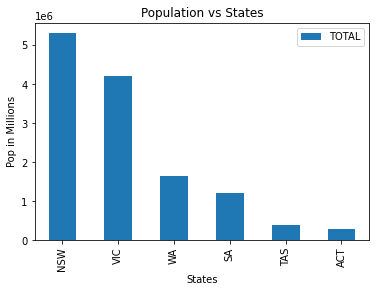

In [37]:
#Total population
population_2019.plot.bar(x='StateAb', y='TOTAL')
plt.xlabel('States')
plt.ylabel('Pop in Millions')
plt.title('Population vs States')

Next, Labour party and Liberal/National party vote totals were compared using another barplot, plotting the amount of votes in millions for each major party against the states.

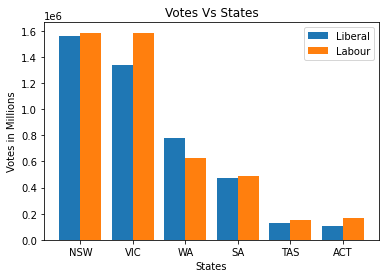

In [38]:
#plotting two bar plots next to each other for comparions

#assigning arrays as our df columns
w=0.4
x = population_2019['StateAb']
Liberal = population_2019['LiberalVotes']
Labour = population_2019['LabourVotes']

#this is spitting the graph up equally using the length of our state array
LiberalBar = np.arange(len(x))
LabourBar = [i+w for i in LiberalBar]

plt.bar(LiberalBar,Liberal,w,label='Liberal')
plt.bar(LabourBar,Labour,w, label='Labour')

plt.xlabel('States')
plt.ylabel('Votes in Millions')
plt.title("Votes Vs States")
plt.xticks(LiberalBar + w/2, x) #here im centering the tick between the two bars
plt.legend()
plt.show()

# Voting 2016 Visualisation


In [39]:
voting_2016 = ageAndGender_2016.drop(['16-17', '18-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69', '70+'], axis = 1)

population_2016 = voting_2016.drop(voting_2016.index[(voting_2016['Unnamed: 0'] != 'NSW') & 
                                                   (voting_2016['Unnamed: 0'] != 'SA') &
                                                   (voting_2016['Unnamed: 0'] != 'TAS') &
                                                   (voting_2016['Unnamed: 0'] != 'WA') &
                                                   (voting_2016['Unnamed: 0'] != 'ACT') &
                                                   (voting_2016['Unnamed: 0'] != 'VIC')])
population_2016 = population_2016.rename(columns={'Unnamed: 0': 'StateAb'})
population_2016

,StateAb,TOTAL
0,NSW,"5,116,947"


## We make everything into a function from before

In [40]:
def cleaner(dfgender, dfvotes):
    males = dfgender.drop(['16-17', '18-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69', '70+'], axis = 1)
    males = males.drop(males.index[(males["Unnamed: 0"] == 'Female') | (males["Unnamed: 0"] == 'Indeterminate/Unknown')])
    MalesTotal = males.drop(males.index[(males["Unnamed: 0"] != "Male")])
    MalesTotal = MalesTotal.drop(["Unnamed: 0"], axis = 1)
    MalesTotal = MalesTotal.rename(columns={'TOTAL': 'Male_Total'})
    males["Unnamed: 0"] = males["Unnamed: 0"].str.replace(' ', '')
    LGA = males.drop(males.index[(males["Unnamed: 0"] == "Male") 
                            | (males["Unnamed: 0"] == 'NSW')
                            | (males["Unnamed: 0"] == 'VIC')
                            | (males["Unnamed: 0"] == 'NT')
                            | (males["Unnamed: 0"] == 'ACT')
                            | (males["Unnamed: 0"] == 'WA')
                            | (males["Unnamed: 0"] == 'TAS')
                            | (males["Unnamed: 0"] == 'SA')
                            | (males["Unnamed: 0"] == 'QLD')
                            | (males["Unnamed: 0"] == 'GrandTotal')])
    LGA = LGA.rename(columns={'Unnamed: 0': 'LGA'})
    LGA = LGA.rename(columns={'TOTAL': 'LGA TOTAL'})
    LGA = LGA.reset_index()
    LGA = LGA.drop(["index"], axis = 1)
    MalesTotal = MalesTotal.reset_index()
    MalesTotal = MalesTotal.drop(["index"], axis = 1)
    MaleLGA = LGA.join(MalesTotal)
    
    females = dfgender.drop(['16-17', '18-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69', '70+'], axis = 1)
    females = females.drop(females.index[(females["Unnamed: 0"] == 'Male') | (males["Unnamed: 0"] == 'Indeterminate/Unknown')])
    femalesTotal = females.drop(females.index[(females["Unnamed: 0"] != "Female")])
    femalesTotal = femalesTotal.drop(["Unnamed: 0"], axis = 1)
    femalesTotal = femalesTotal.reset_index()
    femalesTotal = femalesTotal.drop(["index"], axis = 1)
    femalesTotal = femalesTotal.rename(columns={'TOTAL': 'Female_Total'})
    femaleLGA = LGA.join(femalesTotal) 
    
    GenderByLGA = pd.merge(femaleLGA ,MaleLGA, on="LGA" )
    GenderByLGA = GenderByLGA.drop(["LGA TOTAL_y"], axis = 1)
    GenderByLGA = GenderByLGA.rename(columns={'LGA TOTAL_x': 'LGA TOTAL'})
    GenderByLGA = GenderByLGA.drop(['LGA TOTAL'], axis = 1)
    
    GenderByLGA['Female_Total'] = GenderByLGA['Female_Total'].str.replace(',', '').astype(int)
    GenderByLGA['Male_Total'] = GenderByLGA['Male_Total'].str.replace(',', '').astype(int)
    
    GenderByLGA['Female_Total'] = GenderByLGA['Female_Total']
    GenderByLGA['Male_Total'] = GenderByLGA['Male_Total']
    GenderByLGA['Total_Population'] = GenderByLGA['Male_Total'] + GenderByLGA['Female_Total']
    ages = dfgender.copy()
    ages = ages.drop(ages.index[(ages["Unnamed: 0"] == "Male") 
                            |(ages["Unnamed: 0"] == "Female")
                            |(ages["Unnamed: 0"] == "Indeterminate/Unknown")
                            | (ages["Unnamed: 0"] == 'NSW')
                            | (ages["Unnamed: 0"] == 'VIC')
                            | (ages["Unnamed: 0"] == 'NT')
                            | (ages["Unnamed: 0"] == 'ACT')
                            | (ages["Unnamed: 0"] == 'WA')
                            | (ages["Unnamed: 0"] == 'TAS')
                            | (ages["Unnamed: 0"] == 'SA')
                            | (ages["Unnamed: 0"] == 'QLD')
                            | (ages["Unnamed: 0"] == 'Grand Total')])
    ages = ages.drop(['TOTAL'], axis = 1)
    ages = ages.rename(columns={'Unnamed: 0': 'LGA'})
    ages['16-17'] = ages['16-17'].str.replace(',', '').astype(int)
    ages['18-19'] = ages['18-19'].str.replace(',', '').astype(int)
    ages['20-24'] = ages['20-24'].str.replace(',', '').astype(int)
    ages['25-29'] = ages['25-29'].str.replace(',', '').astype(int)
    ages['30-34'] = ages['30-34'].str.replace(',', '').astype(int)
    ages['35-39'] = ages['35-39'].str.replace(',', '').astype(int)
    ages['40-44'] = ages['40-44'].str.replace(',', '').astype(int)
    ages['45-49'] = ages['45-49'].str.replace(',', '').astype(int)
    ages['50-54'] = ages['50-54'].str.replace(',', '').astype(int)
    ages['55-59'] = ages['55-59'].str.replace(',', '').astype(int)
    ages['60-64'] = ages['60-64'].str.replace(',', '').astype(int)
    ages['65-69'] = ages['65-69'].str.replace(',', '').astype(int)
    ages['70+'  ] = ages['70+'  ].str.replace(',', '').astype(int)
    ageAndGenderByLGA = pd.merge(ages ,GenderByLGA, on="LGA" )
    LGAWin = dfvotes.drop(['DivisionID', 'BallotPosition', "CandidateID", "Surname", "GivenNm"], axis = 1)
    VoteLGA = LGAWin["DivisionNm"].unique()
    for x in VoteLGA:
        LGA = LGAWin[LGAWin["DivisionNm"] == x]
        CountMax = LGA['CountNumber'].max()
        LGAWin = LGAWin.drop(LGAWin.index[(LGAWin["DivisionNm"] == x) &(LGAWin["CountNumber"] != CountMax)])
    LGAWin = LGAWin.drop(LGAWin.index[(LGAWin["CalculationValue"] <= 0.0)])
    LGAWin = LGAWin.drop(LGAWin.index[(LGAWin["CalculationType"] == "Transfer Count")])
    LGAWin = LGAWin.drop(LGAWin.index[(LGAWin["CalculationType"] == "Transfer Percent")])
    LP = LGAWin[LGAWin["PartyAb"]=='LP']
    LPCount = LP[LP["CalculationType"]=='Preference Count']
    LPCount = LPCount.rename(columns={'CalculationValue': 'LiberalCount'})
    LPCount = LPCount.drop(['CountNumber', 'PartyNm', "HistoricElected", "CalculationType", 'PartyAb',"Elected"], axis = 1)
    ALPCount = LGAWin[LGAWin["PartyAb"]=='ALP']
    ALPCount = ALPCount[ALPCount["CalculationType"]=='Preference Count']
    ALPCount = ALPCount.drop(['CountNumber', 'PartyNm', "HistoricElected", "CalculationType", 'PartyAb',"Elected", 'StateAb'], axis = 1)
    ALPCount = ALPCount.rename(columns={'CalculationValue': 'LabourCount'})
    VoteCountByLGA = pd.merge(LPCount, ALPCount, on="DivisionNm")
    VoteCountByLGA = VoteCountByLGA.rename(columns={'DivisionNm': 'LGA'})
    AgeGenderVoteLGA = pd.merge(VoteCountByLGA ,ageAndGenderByLGA, on="LGA" )
    AgeGenderVoteLGA["Female_Total%"] = AgeGenderVoteLGA["Female_Total"]/AgeGenderVoteLGA["Total_Population"]
    AgeGenderVoteLGA["Male_Total%"] = AgeGenderVoteLGA["Male_Total"]/AgeGenderVoteLGA["Total_Population"]
    AgeGenderVoteLGA["Age_Total"] = AgeGenderVoteLGA["16-17"] + AgeGenderVoteLGA["18-19"] + AgeGenderVoteLGA["20-24"] + AgeGenderVoteLGA["25-29"] + AgeGenderVoteLGA["30-34"] + AgeGenderVoteLGA["35-39"] + AgeGenderVoteLGA["40-44"] + AgeGenderVoteLGA["45-49"] + AgeGenderVoteLGA["50-54"] + AgeGenderVoteLGA["55-59"] + AgeGenderVoteLGA["60-64"] + AgeGenderVoteLGA["65-69"] + AgeGenderVoteLGA["70+"]
    AgeGenderVoteLGA["16-17%"] = AgeGenderVoteLGA["16-17"]/AgeGenderVoteLGA["Age_Total"]
    AgeGenderVoteLGA["18-19%"] = AgeGenderVoteLGA["18-19"]/AgeGenderVoteLGA["Age_Total"]
    AgeGenderVoteLGA["20-24%"] = AgeGenderVoteLGA["20-24"]/AgeGenderVoteLGA["Age_Total"]
    AgeGenderVoteLGA["25-29%"] = AgeGenderVoteLGA["25-29"]/AgeGenderVoteLGA["Age_Total"]
    AgeGenderVoteLGA["30-34%"] = AgeGenderVoteLGA["30-34"]/AgeGenderVoteLGA["Age_Total"]
    AgeGenderVoteLGA["35-39%"] = AgeGenderVoteLGA["35-39"]/AgeGenderVoteLGA["Age_Total"]
    AgeGenderVoteLGA["40-44%"] = AgeGenderVoteLGA["40-44"]/AgeGenderVoteLGA["Age_Total"]
    AgeGenderVoteLGA["45-49%"] = AgeGenderVoteLGA["45-49"]/AgeGenderVoteLGA["Age_Total"]
    AgeGenderVoteLGA["50-54%"] = AgeGenderVoteLGA["50-54"]/AgeGenderVoteLGA["Age_Total"]
    AgeGenderVoteLGA["55-59%"] = AgeGenderVoteLGA["55-59"]/AgeGenderVoteLGA["Age_Total"]
    AgeGenderVoteLGA["60-64%"] = AgeGenderVoteLGA["60-64"]/AgeGenderVoteLGA["Age_Total"]
    AgeGenderVoteLGA["65-69%"] = AgeGenderVoteLGA["65-69"]/AgeGenderVoteLGA["Age_Total"]
    AgeGenderVoteLGA["70+%"] = AgeGenderVoteLGA["70+"]/AgeGenderVoteLGA["Age_Total"]
    #AgeGenderVoteLGA = AgeGenderVoteLGA.drop(['16-17', '18-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70+', "Female_Total", "Male_Total", "Age_Total", "Total_Population"], axis =1)
    AgeGenderVoteLGA
    return AgeGenderVoteLGA

### Use above function to generate 2019, 2016 datasets

We want to have multiple years worth of data to hopefully better find trends or relations for our model. So we get the 3 year time intervaled data and clean them

In [41]:
data2019 = cleaner(pd.read_csv('files/AgeAndGenderByElectrate2019.csv'), pd.read_csv('files/VoteCountByElectrate2019.csv'))
data2019['Year'] = 2019

In [42]:
data2016 = cleaner(pd.read_csv('files/AgeAndGenderByElectrate2016.csv'), pd.read_csv('files/VoteCountByElectrate2016.csv'))
data2016['Year'] = 2016

In [43]:
data2021 = cleaner(pd.read_csv('files/AgeAndGenderByElectrate2021.csv'), pd.read_csv('files/VoteCountByElectrate.csv'))
data2021['Year'] = 2021

In [44]:
#data2010 = cleaner(pd.read_csv('files/AgeAndGenderByElectrate2010.csv'), pd.read_csv('files/VoteCountByElectrate2010.csv'))
#data2010['Year'] = 2010

### Merge the datasets into masterdataframe

Now that all csv files have been cleaned the same way, we can merge them into one masterdataframe.

In [45]:
masterdataframe = pd.concat([data2016, data2019])
masterdataframe

,StateAb,LGA,LiberalCount,LabourCount,16-17,18-19,20-24,25-29,30-34,35-39,...,30-34%,35-39%,40-44%,45-49%,50-54%,55-59%,60-64%,65-69%,70+%,Year
0,ACT,Canberra,53473.0,75247.0,881,4849,12553,12967,12944,11832,...,0.089629,0.081929,0.085121,0.088085,0.090321,0.084796,0.073550,0.066529,0.123655,2016
1,ACT,Fenner,44780.0,79242.0,829,4022,12585,14580,16366,15412,...,0.116882,0.110069,0.101613,0.088637,0.075103,0.068490,0.059291,0.055599,0.095664,2016
2,NSW,Banks,46210.0,43622.0,551,2923,8206,8119,8520,8526,...,0.080622,0.080679,0.086508,0.086366,0.091675,0.087360,0.073535,0.065274,0.160629,2016
3,NSW,Barton,36571.0,51131.0,398,2578,7786,8770,10276,9893,...,0.095906,0.092331,0.093787,0.090007,0.086097,0.078098,0.068635,0.063240,0.149608,2016
4,NSW,Bennelong,55077.0,37154.0,598,3054,8456,8348,9265,9250,...,0.086871,0.086731,0.088522,0.086356,0.092553,0.084237,0.073266,0.062418,0.147245,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,WA,Pearce,57478.0,42445.0,74,3258,10268,11338,12103,11702,...,0.100486,0.097156,0.088978,0.098020,0.090274,0.080294,0.065349,0.058292,0.114102,2019
88,WA,Perth,39530.0,48176.0,51,1993,7374,9507,11043,10338,...,0.107962,0.101070,0.084850,0.086825,0.080158,0.078114,0.072933,0.063870,0.139198,2019
89,WA,Stirling,48289.0,38490.0,43,2184,7149,8275,9756,9715,...,0.096171,0.095767,0.085210,0.085949,0.077619,0.076545,0.073075,0.065780,0.169887,2019
90,WA,Swan,44333.0,39804.0,57,2304,9252,9727,10263,9505,...,0.101413,0.093923,0.079526,0.080800,0.075692,0.077609,0.071542,0.063063,0.145563,2019


In [46]:
masterdataframe.loc[(masterdataframe['LiberalCount'] > masterdataframe['LabourCount']), 'Winner'] = "Liberal"

masterdataframe.loc[(masterdataframe['Winner'] != "Liberal"), 'Winner'] = "Labour"

In [47]:
masterdataframe

,StateAb,LGA,LiberalCount,LabourCount,16-17,18-19,20-24,25-29,30-34,35-39,...,35-39%,40-44%,45-49%,50-54%,55-59%,60-64%,65-69%,70+%,Year,Winner
0,ACT,Canberra,53473.0,75247.0,881,4849,12553,12967,12944,11832,...,0.081929,0.085121,0.088085,0.090321,0.084796,0.073550,0.066529,0.123655,2016,Labour
1,ACT,Fenner,44780.0,79242.0,829,4022,12585,14580,16366,15412,...,0.110069,0.101613,0.088637,0.075103,0.068490,0.059291,0.055599,0.095664,2016,Labour
2,NSW,Banks,46210.0,43622.0,551,2923,8206,8119,8520,8526,...,0.080679,0.086508,0.086366,0.091675,0.087360,0.073535,0.065274,0.160629,2016,Liberal
3,NSW,Barton,36571.0,51131.0,398,2578,7786,8770,10276,9893,...,0.092331,0.093787,0.090007,0.086097,0.078098,0.068635,0.063240,0.149608,2016,Labour
4,NSW,Bennelong,55077.0,37154.0,598,3054,8456,8348,9265,9250,...,0.086731,0.088522,0.086356,0.092553,0.084237,0.073266,0.062418,0.147245,2016,Liberal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,WA,Pearce,57478.0,42445.0,74,3258,10268,11338,12103,11702,...,0.097156,0.088978,0.098020,0.090274,0.080294,0.065349,0.058292,0.114102,2019,Liberal
88,WA,Perth,39530.0,48176.0,51,1993,7374,9507,11043,10338,...,0.101070,0.084850,0.086825,0.080158,0.078114,0.072933,0.063870,0.139198,2019,Labour
89,WA,Stirling,48289.0,38490.0,43,2184,7149,8275,9756,9715,...,0.095767,0.085210,0.085949,0.077619,0.076545,0.073075,0.065780,0.169887,2019,Liberal
90,WA,Swan,44333.0,39804.0,57,2304,9252,9727,10263,9505,...,0.093923,0.079526,0.080800,0.075692,0.077609,0.071542,0.063063,0.145563,2019,Liberal


### Remove any irrelevant fields from all the data

We remove LGA, Year, LabourCount, LiberalCount so that we simply have the demographic data. We also needed to change the states from strings into floats so it would be easier to deal with.

In [48]:
#Remove irlelevent fields from df
new_masterdataframe = masterdataframe.drop(['LGA',"LabourCount","Year",'LiberalCount'], axis =1)
new_masterdataframe["StateAb"] = new_masterdataframe["StateAb"].str.replace('ACT', '0')
new_masterdataframe["StateAb"] = new_masterdataframe["StateAb"].str.replace('NSW', '1')
new_masterdataframe["StateAb"] = new_masterdataframe["StateAb"].str.replace('SA', '2')
new_masterdataframe["StateAb"] = new_masterdataframe["StateAb"].str.replace('TAS', '3')
new_masterdataframe["StateAb"] = new_masterdataframe["StateAb"].str.replace('VIC', '4')
new_masterdataframe["StateAb"] = new_masterdataframe["StateAb"].str.replace('WA', '5')
new_masterdataframe

,StateAb,16-17,18-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,...,30-34%,35-39%,40-44%,45-49%,50-54%,55-59%,60-64%,65-69%,70+%,Winner
0,0,881,4849,12553,12967,12944,11832,12293,12721,13044,...,0.089629,0.081929,0.085121,0.088085,0.090321,0.084796,0.073550,0.066529,0.123655,Labour
1,0,829,4022,12585,14580,16366,15412,14228,12411,10516,...,0.116882,0.110069,0.101613,0.088637,0.075103,0.068490,0.059291,0.055599,0.095664,Labour
2,1,551,2923,8206,8119,8520,8526,9142,9127,9688,...,0.080622,0.080679,0.086508,0.086366,0.091675,0.087360,0.073535,0.065274,0.160629,Liberal
3,1,398,2578,7786,8770,10276,9893,10049,9644,9225,...,0.095906,0.092331,0.093787,0.090007,0.086097,0.078098,0.068635,0.063240,0.149608,Labour
4,1,598,3054,8456,8348,9265,9250,9441,9210,9871,...,0.086871,0.086731,0.088522,0.086356,0.092553,0.084237,0.073266,0.062418,0.147245,Liberal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,5,74,3258,10268,11338,12103,11702,10717,11806,10873,...,0.100486,0.097156,0.088978,0.098020,0.090274,0.080294,0.065349,0.058292,0.114102,Liberal
88,5,51,1993,7374,9507,11043,10338,8679,8881,8199,...,0.107962,0.101070,0.084850,0.086825,0.080158,0.078114,0.072933,0.063870,0.139198,Labour
89,5,43,2184,7149,8275,9756,9715,8644,8719,7874,...,0.096171,0.095767,0.085210,0.085949,0.077619,0.076545,0.073075,0.065780,0.169887,Liberal
90,5,57,2304,9252,9727,10263,9505,8048,8177,7660,...,0.101413,0.093923,0.079526,0.080800,0.075692,0.077609,0.071542,0.063063,0.145563,Liberal


## Building Model

In [49]:
#Import datapacks
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.linear_model import LinearRegression

We can now split the new_masterdataframe into 20/80 training splits to generate logistic model. After we fit the model onto our test train split, we evaluate the model based on accuracy score and confusion matrix. 

In [50]:
train, test = train_test_split(new_masterdataframe, test_size=0.2, random_state=142)

#Turning non-numeric fields into numeric
#new_masterdataframe = pd.get_dummies(new_masterdataframe, columns = ['StateAb'])

#Separating the data into training and testing with the predicted variables
X_train = train.drop(["Winner"], axis = 1)
y_train = train['Winner']
X_test = test.drop(['Winner'], axis = 1)
y_test = test['Winner']

#fitting LogisticRegression to test_train split
model = LogisticRegression()
model.fit(X_train, y_train)
model.predict(X_test)

#making prediction with model
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

#Evaluating the model 
print('LogisticRegression Model Evaluation')
print('')
print("Accuracy Score on training set:", accuracy_score(y_train, y_train_hat))
print(confusion_matrix(y_train, y_train_hat))

print("Accuracy Score on testing set:", accuracy_score(y_test, y_test_hat))
print(confusion_matrix(y_test, y_test_hat))


LogisticRegression Model Evaluation

Accuracy Score on training set: 0.7517241379310344
[[65 17]
 [19 44]]
Accuracy Score on testing set: 0.6756756756756757
[[15  7]
 [ 5 10]]


Comparing the difference in accuracy of training and test set we can see the model is clearly overfitting. The confusion matrix of both the training and testing set is also very poor with high misclasiffication ratios, e.g. false negatives are around 50% for both training and testing 

## Apply RFE to the model 

We then apply RFE to our logisic model to find the best number of features for the model

In [51]:
# to increment number of features, one at each time
acc_scores = []
for i in range(1,10):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)
    print(rfe.get_support())
    print(rfe.ranking_)
    print()

Acc on test set using 1 features:  0.5945945945945946
[False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]
[18  3  1  2  4  5  9 12 11  6 16  7  8 14 10 17 15 20 19 13 29 30 33 21
 25 28 26 23 24 31 27 32 22]

Acc on test set using 2 features:  0.7027027027027027
[False False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]
[17  2  1  1  3  4  8 11 10  5 15  6  7 13  9 16 14 19 18 12 28 29 32 20
 24 27 25 22 23 30 26 31 21]

Acc on test set using 3 features:  0.6756756756756757
[False  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]
[16  1  1  1  2  3  7 10  

5 features provides best accuracy. With these features being: 'StateAb', '16-17', '18-19', '20-24' and '25-29'.

In [52]:
# creating RFE object
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

# doing evaluation
y_test_hat = rfe.predict(X_test)
print("Accuracy score on test set: ", accuracy_score(y_test, y_test_hat))

print(confusion_matrix(y_test, y_test_hat))

Accuracy score on test set:  0.7567567567567568
[[19  3]
 [ 6  9]]


### Prediction on 2021 data on who wins the federal election

We used our Logistic Regression Model to predict Votes based on 2021 Age, Gender and Voting Party Data

In [53]:
new_data2021 = data2021.drop(['LGA',"LabourCount","Year", 'LiberalCount','LabourCount'], axis = 1)
new_data2021["StateAb"] = new_data2021["StateAb"].str.replace('ACT', '0')
new_data2021["StateAb"] = new_data2021["StateAb"].str.replace('NSW', '1')
new_data2021["StateAb"] = new_data2021["StateAb"].str.replace('SA', '2')
new_data2021["StateAb"] = new_data2021["StateAb"].str.replace('TAS', '3')
new_data2021["StateAb"] = new_data2021["StateAb"].str.replace('VIC', '4')
new_data2021["StateAb"] = new_data2021["StateAb"].str.replace('WA', '5')
new_data2021

,StateAb,16-17,18-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,...,25-29%,30-34%,35-39%,40-44%,45-49%,50-54%,55-59%,60-64%,65-69%,70+%
0,0,60,2236,8067,8852,9661,10267,9375,9451,9197,...,0.082188,0.089700,0.095326,0.087044,0.087750,0.085391,0.084370,0.076831,0.066534,0.148648
1,0,78,2334,9489,10071,9422,9137,8443,7970,7925,...,0.101851,0.095287,0.092405,0.085386,0.080603,0.080148,0.071926,0.066141,0.057120,0.148776
2,0,71,2275,8055,9079,10738,12587,11422,10248,8271,...,0.090400,0.106919,0.125330,0.113730,0.102040,0.082355,0.066862,0.056068,0.047864,0.104868
3,1,43,1984,8234,7941,8221,8841,8887,9198,9091,...,0.074267,0.076886,0.082684,0.083114,0.086023,0.085022,0.088960,0.082946,0.067954,0.176180
4,1,38,1856,7722,8870,9776,10525,9568,9671,9338,...,0.081028,0.089305,0.096147,0.087405,0.088345,0.085303,0.081229,0.072587,0.062393,0.168415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,5,82,3360,10970,11692,12995,13478,11854,12212,12136,...,0.088984,0.098900,0.102576,0.090217,0.092941,0.092363,0.080193,0.067917,0.057042,0.119183
88,5,42,1879,7600,9714,11573,11584,9540,9031,8640,...,0.089922,0.107131,0.107232,0.088311,0.083599,0.079980,0.076222,0.071714,0.063169,0.144584
89,5,40,1968,7308,8279,9907,10705,9105,8841,8432,...,0.078564,0.094013,0.101586,0.086402,0.083897,0.080016,0.073686,0.072026,0.065848,0.175557
90,5,59,2204,9540,10205,10510,10495,8838,8236,8167,...,0.096063,0.098934,0.098793,0.083195,0.077528,0.076879,0.074045,0.070798,0.062467,0.150190


In [54]:
predictions = rfe.predict(new_data2021)
print(predictions)

['Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour'
 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour'
 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour'
 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour'
 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour'
 'Labour' 'Labour' 'Labour' 'Liberal' 'Labour' 'Labour' 'Labour' 'Labour'
 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour'
 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Liberal' 'Labour' 'Labour'
 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour'
 'Labour' 'Labour' 'Labour' 'Liberal' 'Labour' 'Labour' 'Labour' 'Labour'
 'Labour' 'Labour' 'Liberal' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour'
 'Labour' 'Labour' 'Labour' 'Labour']


In [96]:
df_predictions = pd.DataFrame(data={
    'LGA' : data2021['LGA'],
    'Model Predictions' : predictions
})
df_predictions
#df_predictions.to_csv(r'C:\Users\axe12\Desktop\group-project-group-20\table.csv')

,LGA,Model Predictions
0,Bean,Labour
1,Canberra,Labour
2,Fenner,Liberal
3,Banks,Liberal
4,Barton,Labour
...,...,...
87,Pearce,Labour
88,Perth,Labour
89,Stirling,Liberal
90,Swan,Labour


In [56]:
LabourLGA = df_predictions[df_predictions['Model Predictions'] == 'Labour']
LabourLGA = LabourLGA['Model Predictions'].count()
LiberalLGA = df_predictions[df_predictions['Model Predictions'] == 'Liberal']
LiberalLGA = LiberalLGA['Model Predictions'].count()

In [57]:
print('LogisticRegression Model Prediction')
print('Labour LGA wins:', LabourLGA)
print('Liberal LGA wins:', LiberalLGA)

LogisticRegression Model Prediction
Labour LGA wins: 88
Liberal LGA wins: 4


The resulting LGAs won here seems to be abit skewed to Labour winning most LGas. Our model was only 74.5% accurate so there could be some room for improvement. It would be unlikely that one Party wins the most LGAs by this margin.

This model will be a baseline for performance, as although we were able to improve performance through RFE, the accuracy still leaves much to be desired and makes our predicted winner of the election less reliable.

### KNN Classifier


We use a Knn classifer model to possibly improve our predictions from the logistic regression model. We bring the 5 features identified as most important from the RFE. We also had to change the States to int as string would not work. 

In [58]:
Cleaned_masterdf = masterdataframe.filter(['StateAb', '16-17', '18-19', '20-24', '25-29'])
Cleaned_masterdf["StateAb"] = Cleaned_masterdf["StateAb"].str.replace('ACT', '0')
Cleaned_masterdf["StateAb"] = Cleaned_masterdf["StateAb"].str.replace('NSW', '1')
Cleaned_masterdf["StateAb"] = Cleaned_masterdf["StateAb"].str.replace('SA', '2')
Cleaned_masterdf["StateAb"] = Cleaned_masterdf["StateAb"].str.replace('TAS', '3')
Cleaned_masterdf["StateAb"] = Cleaned_masterdf["StateAb"].str.replace('VIC', '4')
Cleaned_masterdf["StateAb"] = Cleaned_masterdf["StateAb"].str.replace('WA', '5')
Cleaned_masterdf

,StateAb,16-17,18-19,20-24,25-29
0,0,881,4849,12553,12967
1,0,829,4022,12585,14580
2,1,551,2923,8206,8119
3,1,398,2578,7786,8770
4,1,598,3054,8456,8348
...,...,...,...,...,...
87,5,74,3258,10268,11338
88,5,51,1993,7374,9507
89,5,43,2184,7149,8275
90,5,57,2304,9252,9727


Also needed to make an array with just the Party winner for each state to use as our class/target.

In [59]:
PartyVote = masterdataframe['Winner']
PartyVote

0      Labour
1      Labour
2     Liberal
3      Labour
4     Liberal
       ...   
87    Liberal
88     Labour
89    Liberal
90    Liberal
91    Liberal
Name: Winner, Length: 182, dtype: object

The output of the train_test_split function is X_train, X_test, y_train, and y_test, which are all NumPy arrays. X_train contains 75% of the rows of the dataset, and X_test contains the remaining 25%:

In [60]:
#Training the 
X_train, X_test, y_train, y_test = train_test_split(Cleaned_masterdf, PartyVote, random_state=142)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (136, 5)
y_train shape: (136,)
X_test shape: (46, 5)
y_test shape: (46,)


**Model Training**: To build the model on the training set, we call the 'fit' method of the knn object, which takes as arguments the NumPy array X_train containing the training data and the NumPy array y_train of the corresponding training labels.

In [61]:
# Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN classifier model
clf_knn = KNeighborsClassifier(n_neighbors=1)

# Train the model with the training data
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

**Prediction**: We can now make predictions using this model on new data for which we might not know the correct labels. Imagine we find data where StateAb was 1(NSW), number of people between 16-17 was 721 , number of people between 18-19 was 3210, number of people between 20-24 was 9860 , and number of people between 25-29 was 10354. What would be the winning party in voting?

In [62]:
# Produce the features of a testing data instance
X_new = np.array([[1, 721, 3210, 9860, 10354]])
print("X_new.shape: {}".format(X_new.shape))
# Predict the result label of X_new:
y_new_pred = clf_knn.predict(X_new)
print("The predicted class is: \n", y_new_pred)

X_new.shape: (1, 5)
The predicted class is: 
 ['Labour']


**Evaluating Model**: This is where the test set that we created earlier comes in. This data was not used to build the model, but we do know what the correct party winner is for each voter in the test set. So, we can use the trained model to predict these data instances and calculate the accuracy to evaluate how good the model is

In [63]:
#Testing the Accuracy 
y_pred =  clf_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:" , accuracy)

Accuracy: 0.6739130434782609


**Manual tuning with cross validation**: Plot the misclassification error versus  **𝐾** . You need to figure out the possible values of  **𝐾**

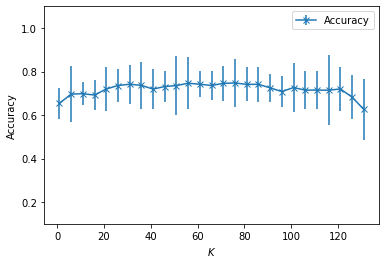

In [64]:
#Perameter tuning with Cross Validation
from sklearn.model_selection import cross_val_score, KFold
cv_scores = []
cv_scores_std = []
k_range = range(1, 135, 5)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, Cleaned_masterdf, PartyVote, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')

Check against the figure plotted above to see if the selected hyperparameter  𝐾  can lead to the highest misclassification accuracy.

In [65]:
from sklearn.model_selection import GridSearchCV
parameter_grid = {'n_neighbors': range(1, 135, 5)}
knn_clf = KNeighborsClassifier()
gs_knn = GridSearchCV(knn_clf, parameter_grid, scoring ='accuracy', cv=KFold(n_splits=10, shuffle=True))
gs_knn.fit(Cleaned_masterdf, PartyVote)
print('Best K: ', gs_knn.best_params_['n_neighbors'])
print('Accuracy: ', gs_knn.best_score_)

Best K:  81
Accuracy:  0.7461988304093568


# Apply KNN to 2021 data

Predicting Party that wins votes with our KNN model on the same 2021 data as Logistic regression.

In [66]:
knn2021 = new_data2021.filter(['StateAb', '16-17', '18-19', '20-24', '25-29'])
knn2021

,StateAb,16-17,18-19,20-24,25-29
0,0,60,2236,8067,8852
1,0,78,2334,9489,10071
2,0,71,2275,8055,9079
3,1,43,1984,8234,7941
4,1,38,1856,7722,8870
...,...,...,...,...,...
87,5,82,3360,10970,11692
88,5,42,1879,7600,9714
89,5,40,1968,7308,8279
90,5,59,2204,9540,10205


In [67]:
predictions =  clf_knn.predict(knn2021)
predictions

array(['Labour', 'Labour', 'Liberal', 'Liberal', 'Labour', 'Labour',
       'Liberal', 'Labour', 'Liberal', 'Labour', 'Liberal', 'Labour',
       'Labour', 'Liberal', 'Labour', 'Liberal', 'Labour', 'Liberal',
       'Labour', 'Labour', 'Labour', 'Liberal', 'Liberal', 'Labour',
       'Liberal', 'Labour', 'Labour', 'Labour', 'Labour', 'Liberal',
       'Labour', 'Labour', 'Labour', 'Labour', 'Labour', 'Liberal',
       'Labour', 'Liberal', 'Liberal', 'Liberal', 'Labour', 'Labour',
       'Labour', 'Liberal', 'Liberal', 'Labour', 'Liberal', 'Labour',
       'Labour', 'Labour', 'Labour', 'Labour', 'Labour', 'Liberal',
       'Labour', 'Liberal', 'Liberal', 'Labour', 'Liberal', 'Labour',
       'Labour', 'Liberal', 'Labour', 'Labour', 'Labour', 'Labour',
       'Liberal', 'Liberal', 'Labour', 'Labour', 'Liberal', 'Labour',
       'Liberal', 'Liberal', 'Labour', 'Labour', 'Labour', 'Labour',
       'Liberal', 'Liberal', 'Liberal', 'Liberal', 'Liberal', 'Labour',
       'Liberal', 'Liberal',

In [97]:
df_predictions = pd.DataFrame(data={
    'LGA' : data2021['LGA'],
    'Model Predictions' : predictions
})
df_predictions.to_csv(r'C:\Users\axe12\Desktop\group-project-group-20\KNN.csv')

In [69]:
LabourLGA = df_predictions[df_predictions['Model Predictions'] == 'Labour']
LabourLGA = LabourLGA['Model Predictions'].count()
LiberalLGA = df_predictions[df_predictions['Model Predictions'] == 'Liberal']
LiberalLGA = LiberalLGA['Model Predictions'].count()

In [70]:
print('KNN Model Prediction')
print('Labour LGA wins:', LabourLGA)
print('Liberal LGA wins:', LiberalLGA)

KNN Model Prediction
Labour LGA wins: 53
Liberal LGA wins: 39


This time round we see a more even distribution of LGA wins between the two major parties. However, the accuracy of the model was only slightly better than the logistic regression so both predictions arent as reliable as we would like to correctly guess the possible outcome of a 2021 election. 

Overall, the model performed poorly when firsted tested, though after cross validation we found the best K with a better accuracy but still not the greatest. This model is only a slight step up from LogisticRegression in accuracy, and it is possible a more complex model could have a better performance. 

## CLUSTERING


In [71]:
def population(data):
    data["Average_age"] = (data["16-17"]*16.5 + data["18-19"]*18.5 + data["20-24"]*22 + data["25-29"]*27 + data["30-34"]*32 + data["35-39"]*37 + data["40-44"]*42 + data["45-49"]*57 + data["50-54"]*52 + data["55-59"]*57 + data["60-64"]*62 + data["65-69"]*67 + data["70+"]*72)/data['Age_Total']
    
    return data

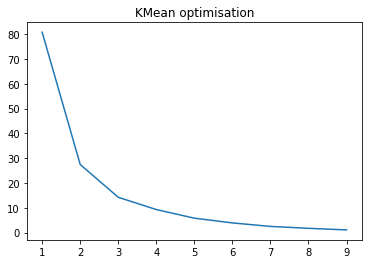

In [72]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


age_population= population(masterdataframe)
age2016 = age_population[age_population['Year'] == 2016]

liberal = age2016[age2016['Winner']=='Liberal']
labour = age2016[age2016['Winner']=='Labour']

age2016 = age2016.replace(to_replace ="Labour", value = 0)
age2016 = age2016.replace(to_replace ="Liberal", value = 10)

cleaner = age2016.loc[:, ['Winner', 'Average_age']]

cleaner_liberal = cleaner[cleaner['Winner'] == 10]
cleaner_labour = cleaner[cleaner['Winner'] == 0]

#plt.scatter(age2016['Winner'], age2016['Average_age'])

def plotKmean(data):
    Sum_of_squared_distances = []
    K = range(1,10)
    for num_clusters in K :
        kmeans = KMeans(n_clusters = num_clusters)
        kmeans.fit(data)
        Sum_of_squared_distances.append(kmeans.inertia_)
    plt.plot(K,Sum_of_squared_distances)
    plt.title('KMean optimisation')

plotKmean(cleaner_liberal)

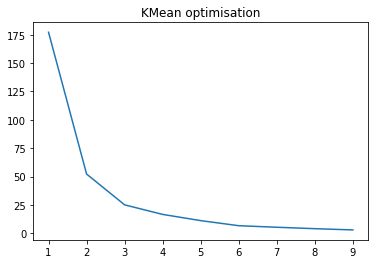

In [73]:
plotKmean(cleaner_labour)

In [74]:
centroid2016 = pd.DataFrame(columns = ['labour' , 'liberal'])

def kmeanExplanation(nclusters, data, centroid):
    kmeans = KMeans(n_clusters = nclusters)
    kmeans.fit(data)
    identified_clusters = kmeans.fit_predict(data)
    data_with_clusters = data.copy()
    data_with_clusters['Clusters'] = identified_clusters 
    centers = np.array(kmeans.cluster_centers_)

    new_center = np.delete(centers, [0,0])
    new_center = np.delete(new_center, [1])
    new_center = np.delete(new_center, [2])
    

    centroid[data.name] = new_center.tolist()
    
    return data_with_clusters

cleaner_labour.name = 'labour'
cleaner_liberal.name = 'liberal'

liberal_clusters = kmeanExplanation(3,cleaner_liberal, centroid2016)
#
labour_clusters = kmeanExplanation(3,cleaner_labour, centroid2016)

centroid2016

,labour,liberal
0,45.464772,49.605812
1,49.758551,47.636390
2,47.561875,51.531761


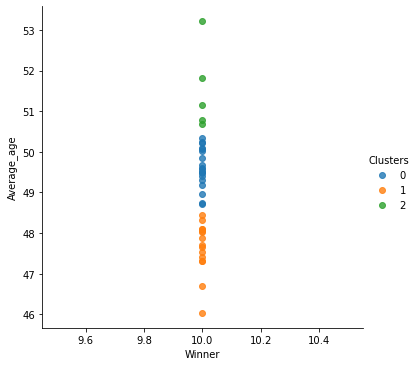

In [75]:
sns.lmplot(data=liberal_clusters, x='Winner', y='Average_age', hue='Clusters', 
          fit_reg=False, legend=True, legend_out=True)

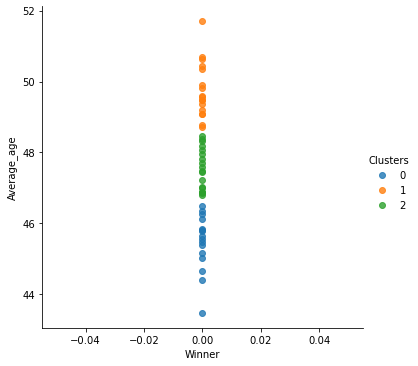

In [76]:
sns.lmplot(data=labour_clusters, x='Winner', y='Average_age', hue='Clusters', 
          fit_reg=False, legend=True, legend_out=True)

## Predicitng the clusters on the 2021 data

We can first predict to see how many clusters we need for our cluster model

In [77]:

age2021 = pd.merge(data2021,df_predictions, on = 'LGA')
#new_data2021[]

age2021 = age2021.replace(to_replace ="Labour", value = 0)
age2021 = age2021.replace(to_replace ="Liberal", value = 10)
age2021 = population(age2021)
age2021
cleaner = age2021.loc[:, ['Model Predictions', 'Average_age']]
cleaner_liberal = cleaner[cleaner['Model Predictions'] == 10]
cleaner_labour = cleaner[cleaner['Model Predictions'] == 0]


centroid2021 = pd.DataFrame(columns = ['labour' , 'liberal'])
cleaner_labour.name = 'labour'
cleaner_liberal.name = 'liberal'
liberal_clusters = kmeanExplanation(3,cleaner_liberal, centroid2021)
labour_clusters = kmeanExplanation(3,cleaner_labour, centroid2021)

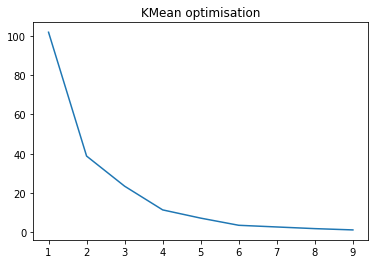

In [78]:
plotKmean(cleaner_liberal)

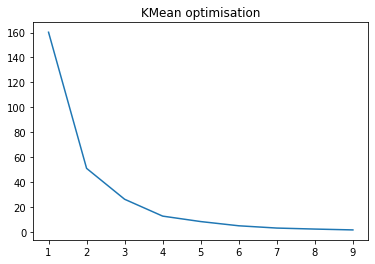

In [79]:
plotKmean(cleaner_labour)

From these graphs the model shows a optimal clusters of 3, which we can then use to generate liberal and labour clusters. We can visually display these clusters in a scatterplot with a legend

In [80]:
liberal_clusters = kmeanExplanation(3,cleaner_liberal, centroid2021)
labour_clusters = kmeanExplanation(3,cleaner_labour, centroid2021)

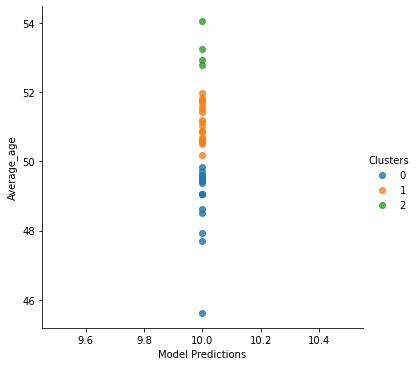

In [81]:
sns.lmplot(data=liberal_clusters, x='Model Predictions', y='Average_age', hue='Clusters', 
          fit_reg=False, legend=True, legend_out=True)

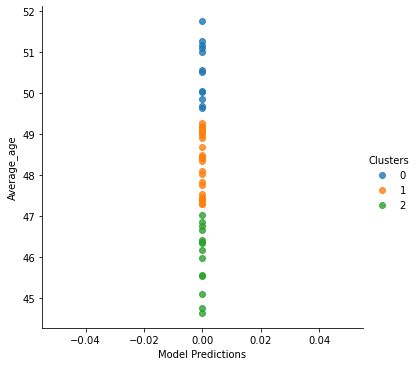

In [82]:
sns.lmplot(data=labour_clusters, x='Model Predictions', y='Average_age', hue='Clusters', 
          fit_reg=False, legend=True, legend_out=True)

In [83]:
centroid2021['col'] = 2021
centroid2016['col'] = 2016

### We can compare the difference in centroids from 2016 and 2021 with seperating Liberal and Labour

Text(0.5, 1.0, 'Liberal')

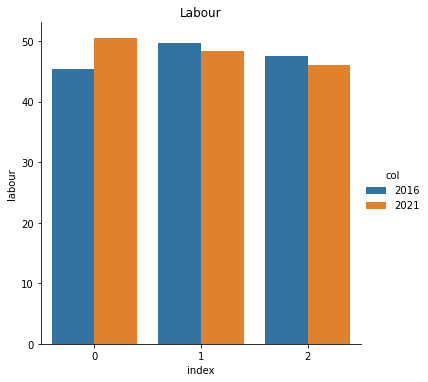

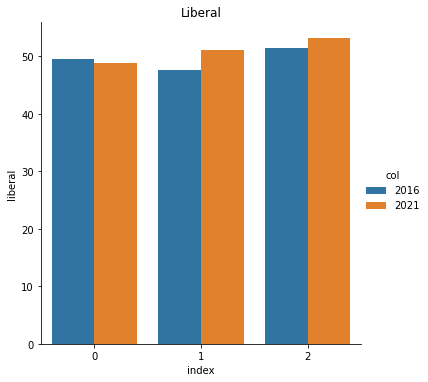

In [84]:
_centroid = pd.concat([centroid2016, centroid2021], ignore_index=False)
#_centroid['Index'] = 1:6
_centroid.reset_index(inplace=True)
_centroid
sns.factorplot(x='index', y='labour', hue='col', kind='bar', data=_centroid)
plt.title('Labour')

sns.factorplot(x='index', y='liberal', hue='col', kind='bar', data=_centroid)
plt.title('Liberal')

We can add further validation to our model as we see that the difference in our 2016, 2021 data when grouping the LGA's on the winning party. These cluster models have centroids in similar position.

# Conclusion and future improvements

In conclusion, it appears that features such as state, and the ages 16-17, 18-19, 20-24, 25-29 are the most important features when building our model.

The project began with the cleaning of the age and gender dataframe. This dataframe contained the age and gender data for each LGA however was split over multiple rows. As such the data was cleaned so each LGA only had 1 row each. 

The next part was cleaning the polling data. This dataframe contained the counts of votes for each candidate in each LGA as well as showing the preferential voting system. This caused each electrate to contain often over 30 rows each which had to be cleaned down to just show 1 row for each LGA. In this one row the Liberal Count, Labour Count and Electrate Name were all the rows needed. From comparing the counts of Liberal And Labour we then created a new column that displayed the winning party of the electrate. 

Next we merged the Age and Gender dataframe with the polling data to create a masterdataframe that could then be used to build machine learning models.

From using the merged dataframe we then went on to build 2 models. A logisic regression model and a K-Nearest Classifier Model. However neither of these models are really sufficent to predict a winner as they suffered from low accuracy scores on the training and testing data. Both had a score of 75% which while seems reasonably high, a score of 90% would of been much more needed to effectivly predict a winner.

Between these two models the better one apeared to be K-Nearest Classifier appeared due as it appeared to have a more balance approach in predicting the election winner from 2021 data. 

From applying the 2021 to both of these models, if the election were to be called today the predicted winner would be of the Federal Election would be Labour winning 53 electrates to Liberals 39 electrates. 

Some improvements that could be preformed on this project include:
- Greater Learning and testing dataset. This dataset only contains 182 rows, futhermore could use more years data to create more rows which would increase the amount of data for the machine learning models.
- Different more effetive machine learning methods applied. In the project only 2 machine learning methods were applied which were K-Nearest Classifier and Logistic Regression. These two models did not preform particularly well with only 75% accuracy. Other methods such as a decision tree or artificial neural networks may of preformed better
- In the data cleaning we removed the many of the smaller political parties such as the Greens and indepedents. Which these parties are often smaller and do not win many seats these parties still play a major part in the election.  
